Azkia Mudrikah

Analisis ini dilakukan guna menemukan faktor yang dapat meningkatkan prestasi siswa ditinjau dari hasil ujian siswa khususnya pada faktor-faktor yang berasal dari dalam diri siswa itu sendiri.

# Problem Statement

SMART framework:

1. Specific: Mengoptimalkan faktor-faktor yang mempengaruhi peningkatan hasil ujian siswa.
2. Measurement: Meningkatkan nilai siswa yang belum mencapai KKM (75 dari 100).
3. Achievable: Fokus meningkatkan faktor dari dalam diri siswa seperti menambah jam belajar, mengikuti tutor tambahan dan mengoptimalkan kehadiran di sekolah.
4. Relevant: Berfokus pada diri siswa dapat memberikan hasil yang optimal karena nantinya lingkungan seperti apapun yang siswa hadapi, siswa tetap bisa optimal dalam belajar sehingga hasil ujiannya akan meningkat.
5. Time-Bound: Hasil dapat dilihat dalam waktu 3 bulan (ketika Ujian Tengah Semester)

Tujuan dari analisis ini adalah untuk meningkatkan prestasi siswa dilihat dari hasil ujian, dengan berfokus pada siswa yang nilainya belum sesuai standar (>=75). Meningkatnya nilai ujian siswa ditargetkan dapat tercapai dalam waktu 3 bulan dilihat dari hasil Ujian Tengah Semester. Target ini akan tercapai dengan meningkatkan jam belajar, menambah frekuensi tutor tambahan, dan mengoptimalkan presensi kelas.

# Breaking down the problem

## Main problem: Meningkatkan nilai ujian siswa.

1. Siswa seperti apa yang harus kita beri perhatian lebih mengenai hasil ujiannya?
2. Apakah frekuensi belajar siswa berpengaruh terhadap nilai ujian?
3. Berapa lama waktu belajar mandiri siswa agar nilai ujian dapat mencapai KKM?
4. Dapatkah menambah sesi tutor dan mengoptimalkan kehadiran di kelas berpengaruh pada nilai ujian siswa?
5. Bagaimana pengaruh motivasi siswa terhadap nilai ujian siswa?
6. Apakah lingkaran pertemanan berpengaruh terhadap prestasi belajar siswa?
7. Apakah keterlibatan orang tua dalam pendidikan siswa berpengaruh terhadap prestasi siswa?
8. Apakah kompetensi guru berpengaruh terhadap prestasi siswa?

sumber dataset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?select=StudentPerformanceFactors.csv

In [1]:
import pandas as pd
df = pd.read_csv('D:\\MILESTONE\\MILESTONE 1\\StudentPerformanceFactors.csv')
df

,Hours_Studied(per week),Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions (per month),Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity (hours per week),Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Data Understanding

## Dataset description
>Dataset ini terdiri dari kumpulan pertanyaan survey terhadap ribuan siswa tentang prestasi siswa serta beberapa faktor yang mempengaruhi prestasi mereka. 
## Context
>Memprediksi kegiatan yang bisa dilakukan oleh siswa untuk dapat meningkatkan prestasi belajar mereka.
## Content
>Informasi siswa mengenai jumlah jam belajar perminggu, lamanya waktu untuk melakukan kegiatan fisik, durasi tidur, keterlibatan orang tua, fasilitas pendukung dan lain-lain.

## Kolom

1. Lama belajar dalam satu minggu (dalam jam)
2. Persentase kehadiran di kelas
3. Keterlibatan orang tua pada Pendidikan anak
4. Ketersediaan akses untuk sumber daya Pendidikan
5. Partisipasi siswa dalam ekstrakurikuler
6. Rata-rata jam tidur per malam
7. Nilai ujian sebelumnya
8. Motivasi siswa 
9. Ketersediaan akses internet 
10. Jumlah kehadiran dalam sesi Pelajaran tambahan
11. Pendapatan orang tua 
12. Kualitas guru 
13. Tipe sekolah (public, privat)
14. Pengaruh teman sebaya dalam prestasi akademik 
15. Lama waktu yang dihabiskan untuk beaktivitas fisik perminggu (dalam jam)
16. Adanya hambatan yang mengganggu pembelajaran
17. Level Pendidikan orang tua
18. Jarak dari rumah ke sekolah 
19. Gender 
20. Nilai ujian akhir 

# Data cleaning

Pertama, melihat info dari dataset. Mengetahui info nama kolom beserta tipe data dalam kolom dilakukan untuk mempermudah proses analisis.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Hours_Studied(per week)             6607 non-null   int64 
 1   Attendance                          6607 non-null   int64 
 2   Parental_Involvement                6607 non-null   object
 3   Access_to_Resources                 6607 non-null   object
 4   Extracurricular_Activities          6607 non-null   object
 5   Sleep_Hours                         6607 non-null   int64 
 6   Previous_Scores                     6607 non-null   int64 
 7   Motivation_Level                    6607 non-null   object
 8   Internet_Access                     6607 non-null   object
 9   Tutoring_Sessions (per month)       6607 non-null   int64 
 10  Family_Income                       6607 non-null   object
 11  Teacher_Quality                     6529 non-null   obje

Kode di bawah digunakan untuk memeriksa apakah nama kolom sudah konsisten atau belum.

In [3]:
df.columns

Index(['Hours_Studied(per week)', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions (per month)', 'Family_Income', 'Teacher_Quality',
       'School_Type', 'Peer_Influence', 'Physical_Activity (hours per week)',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender', 'Exam_Score'],
      dtype='object')

Dari rangkuman info di atas, diketahui bahwa seluruh nama kolom sudah konsisten, hanya perlu sedikit manipulasi saja. Terdapat 7 kolom dengan tipe data numerik, 13 data object, 6607 rows, dan 3 kolom mengandung missing value. Sebelum melakukan analisis, dilakukan data cleaning terlebih dahulu. Pertama kita akan manipulasi kolom dengan mengubah nama kolom untuk mempermudah proses analisis, Mengganti white space dengan underscore.

In [4]:
df.rename(columns={'Hours_Studied(per week)':'hours_studied(per_week)', 'Tutoring_Sessions (per month)':'Tutoring_Sessions(per_month)','Physical_Activity (hours per week)':'Physical_Activity(hours_per_week)'}, inplace=True)
df.head(5)

,hours_studied(per_week),Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions(per_month),Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity(hours_per_week),Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Setelah seluruh nama kolom dimanipulasi, berikutnya kita handling missing value dengan menghapus rows yang didalamnya terdapat missing values dan menghapus baris yang duplikat. Setelah seluruh missing value dan duplikat dihapus, periksa lagi informasi keseluruhan dataset.

In [5]:
#menghapus missing value
df.dropna(inplace=True)
#menghapus baris duplikat
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   hours_studied(per_week)            6378 non-null   int64 
 1   Attendance                         6378 non-null   int64 
 2   Parental_Involvement               6378 non-null   object
 3   Access_to_Resources                6378 non-null   object
 4   Extracurricular_Activities         6378 non-null   object
 5   Sleep_Hours                        6378 non-null   int64 
 6   Previous_Scores                    6378 non-null   int64 
 7   Motivation_Level                   6378 non-null   object
 8   Internet_Access                    6378 non-null   object
 9   Tutoring_Sessions(per_month)       6378 non-null   int64 
 10  Family_Income                      6378 non-null   object
 11  Teacher_Quality                    6378 non-null   object
 12  School_Type

Hasil data cleaning terdapat 6378 rows dan tidak ada kolom yang terdapat missing value. Analisis ini berfokus pada faktor-faktor yang berasal dari dalam diri siswa. Berdasarkan kolom-kolom yang ada, dapat ditentukan bahwa kolom yang berkaitan dengan faktor dalam diri siswa adalah:
1. Lama belajar dalam satu minggu (dalam jam)
2. Persentase kehadiran di kelas
3. Motivasi siswa
4. Jumlah kehadiran dalam sesi Pelajaran tambahan

Meski demikian, ada faktor lain yang berasal dari luar yang tetap harus diperhatikan yaitu:
1. Keterlibatan orang tua pada Pendidikan anak
2. Kualitas guru
3. Pengaruh teman sebaya dalam prestasi akademik

Ketiga faktor tambahan di atas perlu diperhatikan karena faktor-faktor tersebut dapat memberi pengaruh yang cukup besar pada diri siswa yaitu orang tua sebagai sosok yang mendidik siswa di rumah, guru yaitu sosok yang mendidik siswa di sekolah, dan lingkaran pertemanan yang seringkali memberikan pengaruh pada pribadi siswa. 

Setelah menentukan kolom mana saja yang dibutuhkan kita bisa menghapus kolom lain yang tidak diperlukan dalam analisis ini.

In [6]:
df = df.drop(columns=['Learning_Disabilities','Previous_Scores','Sleep_Hours','Access_to_Resources', 'Extracurricular_Activities', 'Internet_Access','Family_Income','School_Type', 'Physical_Activity(hours_per_week)','Parental_Education_Level','Distance_from_Home', 'Gender'])

Setelah data yang dibutuhkan terkumpul, langkah selanjutnya adalah memulai analisis.

# Exploratory Data Analysis

### Siswa seperti apa yang harus kita beri perhatian lebih mengenai hasil ujiannya?

Analisis ini berfokus pada siswa yang nilai ujiannya belum melampaui KKM (kurang dari atau sama dengan 75), sehingga siswa dengan nilai kurang dari 76 menjadi fokus utama dalam penelitian ini. Buat dataframe baru dengan nilai ujian <76.

In [7]:
under_KKM = df.loc[df['Exam_Score'] < 76]
under_KKM

,hours_studied(per_week),Attendance,Parental_Involvement,Motivation_Level,Tutoring_Sessions(per_month),Teacher_Quality,Peer_Influence,Exam_Score
0,23,84,Low,Low,0,Medium,Positive,67
1,19,64,Low,Low,2,Medium,Negative,61
2,24,98,Medium,Medium,2,Medium,Neutral,74
3,29,89,Low,Medium,1,Medium,Negative,71
4,19,92,Medium,Medium,3,High,Neutral,70
...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,1,Medium,Positive,68
6603,23,76,High,Medium,3,High,Positive,69
6604,20,90,Medium,Low,3,Medium,Negative,68
6605,10,86,High,High,2,Medium,Positive,68


Setelah data frame hanya berisi nilai di bawah KKM, lakukan perhitungan untuk mengetahui mean, median, dan modus untuk mengetahui gap antara nilai KKM dan rata-rata nilai di bawah KKM.

In [8]:
mean = under_KKM['Exam_Score'].mean()
median = under_KKM['Exam_Score'].median()
modus = under_KKM['Exam_Score'].mode().values[0]

print(f'Rata-rata nilai {mean:.0f}')
print(f'Median nilai {median}')
print(f'Modus nilai {modus}')
print(f'persentase nilai siswa di bawah KKM {round((((len(under_KKM)/len(df)))*100), 2)}%')

Rata-rata nilai 67
Median nilai 67.0
Modus nilai 68
persentase nilai siswa di bawah KKM 98.81%


Kode dibawah ini digunakan untuk memastikan apakah nilai modus yang muncul pada hasil perhitungan di atas merupakan nilai modus satu-satunya pada data ini.

In [9]:
under_KKM['Exam_Score'].value_counts()

Exam_Score
68    738
66    722
67    692
65    650
69    599
70    526
64    478
71    398
63    350
72    298
62    261
61    166
73    133
74    102
60     75
75     48
59     39
58     21
57      4
55      1
56      1
Name: count, dtype: int64

Berikut adalah perbandingan banyak nilai siswa yang mencapai KKM dan siswa yang nilainya masih di bawah KKM.

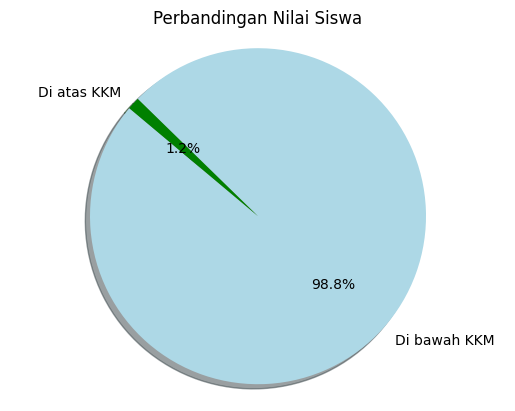

In [10]:
import matplotlib.pyplot as plt

labels = ["Di bawah KKM", "Di atas KKM"]
sizes = [98.81, 1.19]
colors = ['lightblue','green']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Perbandingan Nilai Siswa')
plt.show()

Perbandingan di atas memberikan gambaran jelas betapa sedikit siswa yang berhasil mendapat nilai di atas KKM. Namun kondisi ini tidak terlalu buruk jika melihat nilai rata-rata dan mediannya yaitu sebesar 67 serta nilai modus 68. Nilai rata-rata dan nilai median hanya terpaut 8 skor di bawah 75 dimana selisih skor tersebut bukan selisih yang jauh. Terlebih lagi nilai modusnya 68 dimana nilai ini memiliki gap yang lebih kecil dengan nilai KKM dibanding nilai rata-rata dan median.

Hasil dari perhitungan mean, median, dan modus ini dapat disimpulkan bahwa siswa dengan nilai di bawah KKM bisa diasumsikan bukanlah siswa dengan kemampuan rendah, melainkan mereka hanya butuh sedikit tambahan perhatian untuk dapat melampaui nilai KKM.

### Apakah frekuensi belajar siswa berpengaruh terhadap nilai ujian?

Sebelum melakukan analisis statistik untuk menjawab permasalahan ini, dilakukan uji normalitas terlebih dahulu. Jika melihat dari nilai mean, median, dan modus pada perhitungan sebelumnya, nampaknya data ini berdistribusi normal. Namun asumsi ini tetap harus diperkuat dengan uji normalitas mengingat jumlah datanya besar berpotensi memiliki distribusi yang luas yang menyebabkan data tidak normal.

Uji normalitas dilakukan dengan  metode Kolmogorov-Smirnov Test (K-S Test). Metode ini digunakan karena menurut beberapa sumber, metode Kolmogorov-Smirnov Test (K-S Test) cenderung lebih sensitif terhadap data dengan jumlah besar dan hasilnya cenderung lebih akurat. 

Hipotesis untuk uji normalitas adalah sebagai berikut:

H0 = p-value > 0.05, maka data berdistribusi normal

H1 = p-value < 0.05, maka data tidak berdistribusi normal

In [11]:
from scipy.stats import kstest

stat_jb, p_jb = kstest(under_KKM['hours_studied(per_week)'], 'norm')
stat_nu, p_nu = kstest(under_KKM['Exam_Score'], 'norm')

print(f'P-value Jam Belajar (K-S Test): {p_jb}')
print(f'P-value Nilai Ujian (K-S Test): {p_nu}')


P-value Jam Belajar (K-S Test): 0.0
P-value Nilai Ujian (K-S Test): 0.0


Hasil uji normalitas menunjukkan nilai p < 0.05 maka data tidak berdistribusi normal, dengan demikian pengujian pengaruh banyak jam belajar terhadap nilai ujian dilanjutkan menggunakan metode spearmanr.

In [12]:
from scipy.stats import spearmanr
corr, p_value = spearmanr(under_KKM['hours_studied(per_week)'], under_KKM['Exam_Score'])
print(f'Spearman correlation: {(corr):.2f}, P-value: {p_value}')

Spearman correlation: 0.48, P-value: 0.0


Nilai korelasi sebesar 0.48 menunjukkan adanya korelasi positif antara nilai ujian dan durasi belajar. Artinya ketika durasi belajar meningkat, maka nilai ujian juga cenderung meningkat. Sedangkan nilai p value <0.05 menunjukkan hubungan antara durasi belajar dan nilai ujian merupakan hubungan yang signifikan. 

### Berapa lama waktu belajar mandiri dalam satu minggu agar nilai ujian siswa dapat mencapai KKM?

Setelah mengetahui bahwa lama waktu belajar mandiri berpengaruh terhadap nilai ujian siswa, kita bisa menghitung perkiraan berapa lama waktu belajar yang tepat untuk meningkatkan nilai ujian menggunakan data yang ada. 

Perlu diingat bahwa disini kita ingin mengetahui rentang waktu yang optimal agar siswa dapat mencapai nilai KKM, sehingga waktu belajar yang dijadikan patokan adalah waktu belajar dari data siswa yang nilai ujiannya sudah melampaui KKM. 

Pertama partisi kolom siswa yang nilai ujiannya melebihi KKM dari seluruh dataframe.

In [13]:
upper_KKM = df.loc[df['Exam_Score'] > 75]

Selanjutnya partisi kolom lama belajar dan nilai ujian menjadi satu dataframe baru.

In [14]:
BM2 = upper_KKM[['hours_studied(per_week)','Exam_Score']].groupby('Exam_Score').mean()

Setelah dataframe yang berisi kolom lama jam belajar dan nilai ujian dibuat, langkah selanjutnya kita melakukan perhitungan untuk mengetahui berapa lama waktu belajar yang optimal untuk dapat meningkatkan nilai ujian siswa. Rentang tersebut dapat dihitung dengan mencari confidence interval (dalam kasus ini, confidence interval yang digunakan adalah 95%) dengan kode berikut:

In [15]:
from scipy import stats
import numpy as np

std = BM2['hours_studied(per_week)'].std()     
N = len(BM2)                    
low, up = stats.norm.interval(    
    0.95,                         
    loc=BM2['hours_studied(per_week)'].mean(), 
    scale=std/np.sqrt(N)          
    )
print('Lower Limit:',low)   
print('Upper Limit:',up) 

Lower Limit: 19.47171844692568
Upper Limit: 24.305712108629873


Berdasarkan hasil perhitungan di atas, didapat bahwa waktu belajar yang optimal untuk melampaui nilai KKM adalah 19 - 24 jam dalam seminggu.

### Dapatkah menambah sesi tutor dan mengoptimalkan kehadiran di kelas berpengaruh pada nilai ujian siswa?

Sama seperti sebelumnya, data pada kolom Tutoring_Sessions(per_month) dan attendance juga harus diuji normalitasnya. Hipotesis untuk uji normalitas adalah sebagai berikut:

H0 = p-value > 0.05, maka data berdistribusi normal

H1 = p-value < 0.05, maka data tidak berdistribusi normal

confidence interval dan critical value mirip
memprediksi sesuatu dengan confidence level misal 95%

In [16]:
stat_att, p_att = kstest(under_KKM['Attendance'], 'norm')
stat_ts, p_ts = kstest(under_KKM['Tutoring_Sessions(per_month)'], 'norm')

print(f'P-value attendance (K-S Test): {p_ts}')
print(f'P-value sesi tutoring (K-S Test): {p_ts}')

P-value attendance (K-S Test): 0.0
P-value sesi tutoring (K-S Test): 0.0


Nilai p value < 0.05 menunjukkan kedua data berdistribusi tidak normal.

In [17]:
corr, p_value = spearmanr(under_KKM['Attendance'], under_KKM['Exam_Score'])
corr2, p_value2 = spearmanr(under_KKM['Tutoring_Sessions(per_month)'], under_KKM['Exam_Score'])
print(f'Spearman correlation kehadiran di kelas: {(corr):.2f}, P-value: {p_value:.2f}')
print(f'Spearman correlation tutoring session: {(corr2):.2f}, P-value: {p_value2:.2f}')

Spearman correlation kehadiran di kelas: 0.68, P-value: 0.00
Spearman correlation tutoring session: 0.16, P-value: 0.00


Nilai korelasi antara kehadiran dan tutoring session dengan nilai ujian sebesar 0.68 dan 0.16 menunjukkan adanya korelasi positif antara keduanya dengan nilai ujian. Sedangkan nilai p value <0.05 menunjukkan hubungan antara kehadiran dan tutoring session dengan nilai ujian merupakan hubungan yang signifikan. Dapat disimpulkan bahwa mengoptimalkan kehadiran siswa di kelas dan menambah sesi tutor dapat meningkatkan nilai ujian siswa.

### Bagaimana pengaruh motivasi siswa terhadap nilai ujian siswa?


Untuk mengetahui bagaimana hubungan antara motivasi dan nilai ujian, dilakukan kalkulasi dengan metode sebagai berikut:

In [18]:
Motivation = under_KKM.groupby('Motivation_Level')[['Exam_Score']].mean().reset_index()
Motivation

,Motivation_Level,Exam_Score
0,High,67.491242
1,Low,66.572821
2,Medium,67.130666


Hasil di atas menunjukkan bahwa motivasi siswa berpengaruh terhadap nilai ujian. Meski perbedaannya hanya sedikit, namun tetap saja motivasi ini berpengaruh terhadap nilai ujian siswa. Untuk lebih jelasnya, hasil analisis di atas ditampilkan dalam grafik berikut:

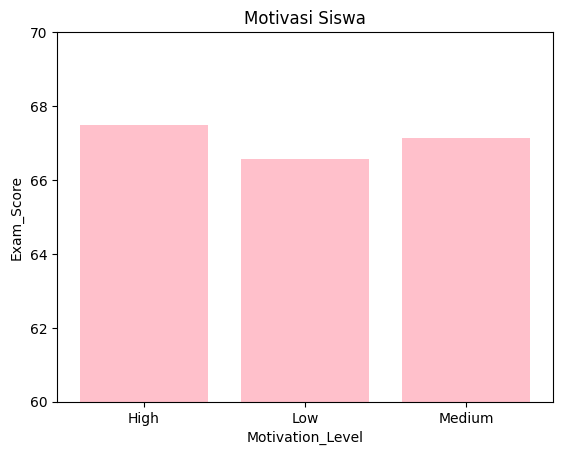

In [19]:
import matplotlib.pyplot as plt

# Membuat grafik line chart
plt.bar(Motivation['Motivation_Level'], Motivation['Exam_Score'], color='pink')

# Menambahkan judul dan label
plt.title('Motivasi Siswa')
plt.xlabel('Motivation_Level')
plt.ylabel('Exam_Score')
plt.ylim(60,70)

# Menampilkan grafik
plt.show()


Melalui grafik ini, penggambaran mengenai pengaruh motivasi siswa terhadap nilai ujian lebih terlihat. Siswa dengan motivasi tinggi nilai ujiannya lebih tinggi daripada siswa dengan motivasi sedang. Begitu pula siswa dengan motivasi sedang, nilai ujiannya lebih tinggi daripada siswa dengan motivasi rendah. Siswa harus pandai mengelola emosi guna menjaga motivasinya dalam belajar.

### Apakah lingkaran pertemanan berpengaruh terhadap prestasi belajar siswa?

In [20]:
Peer_Influence = under_KKM.groupby('Peer_Influence')[['Exam_Score']].mean().reset_index()
Peer_Influence

,Peer_Influence,Exam_Score
0,Negative,66.411676
1,Neutral,66.994316
2,Positive,67.411111


Lingkaran pertemanan seringkali mempengaruhi perilaku suatu individu, dalam hal ini contohnya adalah nilai ujian siswa dapat dipengaruhi oleh lingkaran pertemanannya. Hasil diatas menunjukkan bahwa pertemanan yang positif menunjukkan hasil ujian yang paling tinggi. Berikut adalah grafik hasil kalkulasi di atas:

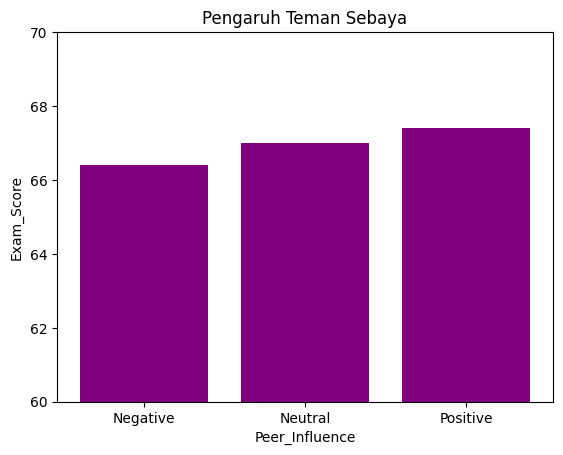

In [21]:
import matplotlib.pyplot as plt

# Membuat grafik line chart
plt.bar(Peer_Influence['Peer_Influence'], Peer_Influence['Exam_Score'], color='purple')

# Menambahkan judul dan label
plt.title('Pengaruh Teman Sebaya')
plt.xlabel('Peer_Influence')
plt.ylabel('Exam_Score')
plt.ylim(60,70)


# Menampilkan grafik
plt.show()

Grafik di atas menunjukkan bahwa semakin baik circle pertemanan siswa, maka semakin baik pula nilai ujiannya. Siswa harus bisa menentukan dengan siapa dia bergaul, apakah pergaulannya membawanya pada hal yang positif atau sebaliknya. Meski lingkaran pertemanan bisa dibilang sebagai faktor dari luar, namun keputusan untuk memilih lingkaran pertemanan merupakan keputusan yang berasal dari siswa itu sendiri.

### Apakah keterlibatan orang tua dalam pendidikan siswa berpengaruh terhadap prestasi siswa?

In [22]:
Parental = under_KKM.groupby('Parental_Involvement')[['Exam_Score']].mean().reset_index()
Parental

,Parental_Involvement,Exam_Score
0,High,67.814444
1,Low,66.157277
2,Medium,66.955645


Hasil analisis di atas menunjukkan keterlibatan orang tua berpengaruh terhadap nilai ujian siswa. Grafik di bawah dapat memberikan gambaran lebih jelas mengenai hal ini.

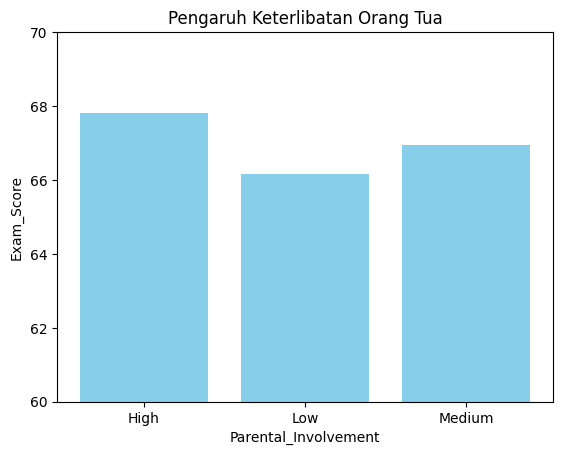

In [23]:
import matplotlib.pyplot as plt

# Membuat bar chart
plt.bar(Parental['Parental_Involvement'], Parental['Exam_Score'], color='skyblue')

# Menambahkan judul dan label
plt.title('Pengaruh Keterlibatan Orang Tua')
plt.xlabel('Parental_Involvement')
plt.ylabel('Exam_Score')
plt.ylim(60, 70) 

# Menampilkan grafik
plt.show()


Orang tua meski dalam hal ini menjadi bagian dari faktor luar yang berpengaruh pada nilai ujian, tetapi bisa dikatakan memiliki keterkaitan yang sangat erat mengingat anak usia sekolah masih banyak memerlukan pantauan orang tua. Sedikit banyaknya orang tua dapat menjadi faktor penunjang apakah siswa bisa menjaga kestabilan emosi, motivasi belajar, dan lainnya. Hal ini bisa menjadi bahan evaluasi bagi para orang tua untuk lebih memperhatikan kondisi anaknya.

### Apakah kompetensi guru berpengaruh terhadap prestasi siswa?

In [24]:
Teacher = under_KKM.groupby('Teacher_Quality')[['Exam_Score']].mean().reset_index()
Teacher

,Teacher_Quality,Exam_Score
0,High,67.423241
1,Low,66.571875
2,Medium,66.927628


Kualitas guru berpengaruh pada nilai ujian siswa seperti yang nampak pada hasil kalkulasi di atas. Meski guru merupakan faktor luar, namun guru adalah seseorang yang bertanggung jawab untuk mendidik dan mengawasi siswa selama kegiatan belajar di sekolah. Pengaruh guru terhadap nilai ujian siswa dapat dilihat lebih jelas pada grafik berikut:

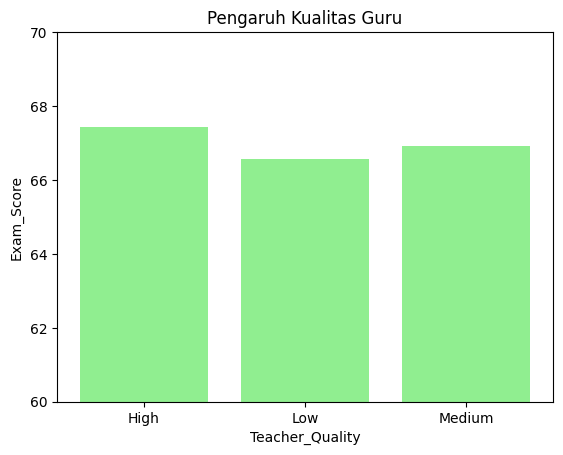

In [25]:
import matplotlib.pyplot as plt

plt.bar(Teacher['Teacher_Quality'], Teacher['Exam_Score'], color='lightgreen')

plt.ylim(60, 70) 
plt.title('Pengaruh Kualitas Guru')
plt.xlabel('Teacher_Quality')
plt.ylabel('Exam_Score')

# Menampilkan grafik
plt.show()

Guru menjadi pengganti orang tua ketika siswa berada di sekolah, sehingga pengaruh guru terhadap nilai ujian siswa bisa dikatakan mirip dengan pengaruh orang tua terhadap nilai ujian siswa. Guru harus bisa memberi semangat dan memberikan pengalaman belajar yang berkesan agar siswa bisa merasa nyaman selama belajar.

# Kesimpulan

Berdasarkan analisis yang telah di lakukan, dapat disimpulkan bahwa faktor yang dapat mempengaruhi nilai ujian siswa adalah sebagai berikut:
1. Durasi belajar mandiri berpengaruh terhadap nilai ujian, dalam hal ini siswa dengan nilai ujian di bawah KKM dapat mengikuti kebiasaan belajar mandiri yang dilakukan oleh siswa yang nilai ujiannya diatas KKM yaitu 19-24 jam dalam satu minggu. 
2. Nilai ujian dapat ditingkatkan dengan memaksimalkan pembelajaran di sekolah salah satunya mengoptimalkan kehadiran siswa dengan menjaga kondisi badan siswa agar persentase kehadirannya bisa maksimal (100%).
3. Kehadiran siswa dalam sesi tutor tambahan dapat membantu meningkatkan nilai ujian. Dalam hal ini siswa harus bisa mengukur diri ketika dia membutuhkan sesi tutor tambahan.
4. Motivasi siswa berpengaruh terhadap nilai ujian karena motivasi adalah hal yang bisa membangkitkan semangat dan menambah antusiasme dalam pelajaran.
5. Siswa harus bisa memilih lingkaran pertemanan karena lingkaran pertemanan dapat memberi pengaruh terhadap diri siswa itu sendiri termasuk pada nilai ujiannya.
6. Orang tua dan guru terlibat dalam meningkatkan nilai ujian siswa. Meski orang tua dan guru merupakan faktor dari luar, namun anak usia sekolah sangat tergantung pada orang dewasa yang ada disekitarnya untuk membentuk apa yang ada di dalam dirinya sehingga kehadiran guru dan orang tua sangat krusial untuk meningkatkan nilai ujian siswa.